In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import os

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/pandas/master/dataset/Graduate%20Admission%202/Admission_Predict_Ver1.1.csv")

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


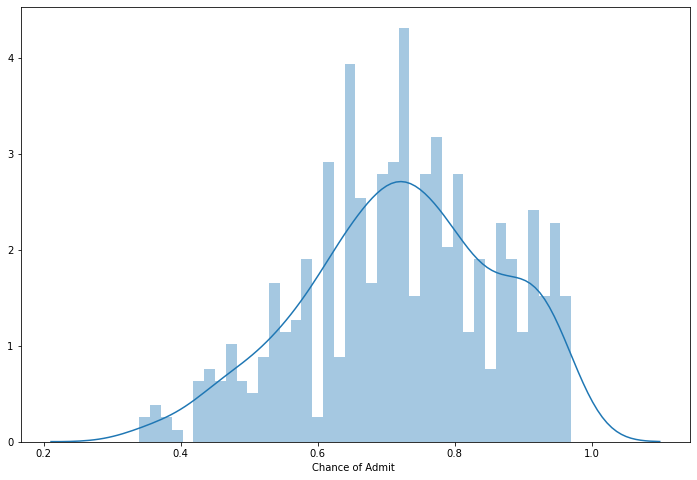

In [9]:
plt.figure(figsize=(12,8))
sns.distplot(df['Chance of Admit '],bins=40)

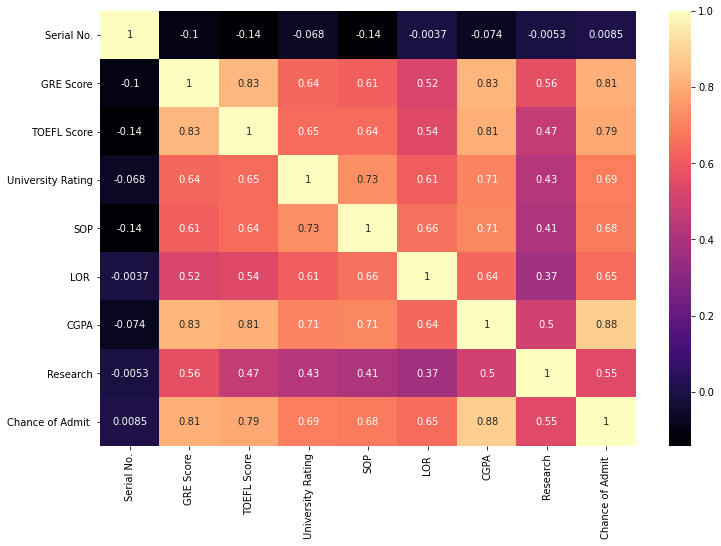

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='magma',annot=True)

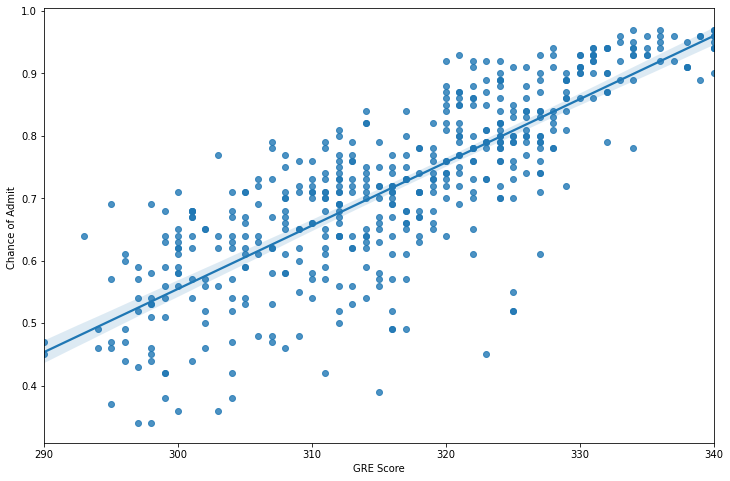

In [11]:
plt.figure(figsize=(12,8))
sns.regplot(x='GRE Score',y='Chance of Admit ',data=df)

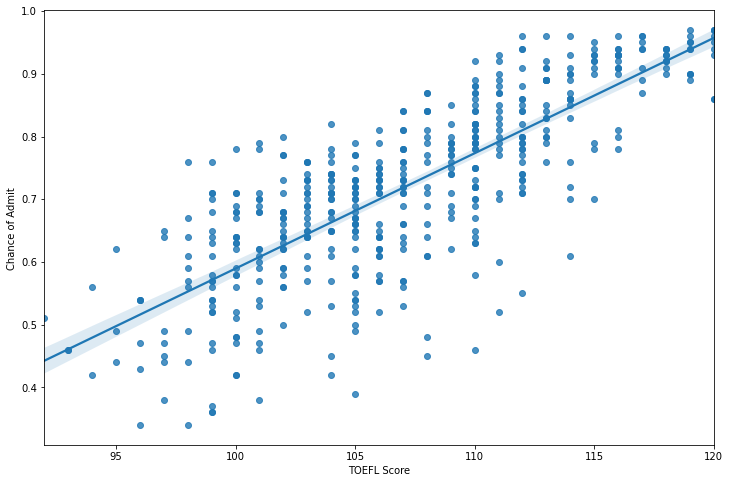

In [12]:
plt.figure(figsize=(12,8))
sns.regplot(x='TOEFL Score',y='Chance of Admit ',data=df)

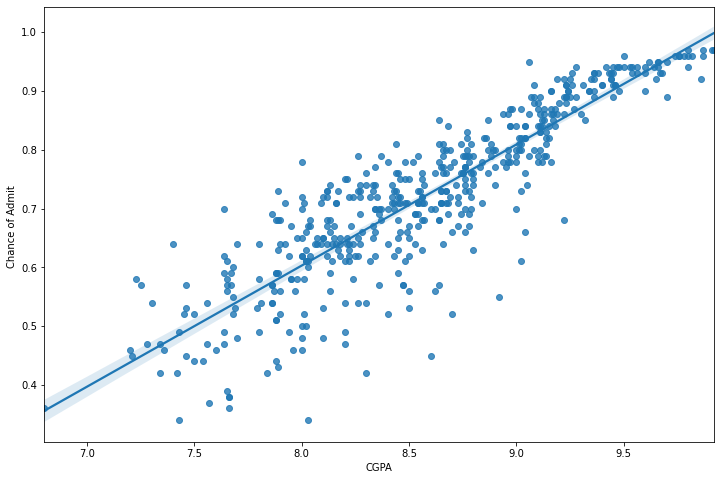

In [13]:
plt.figure(figsize=(12,8))
sns.regplot(x='CGPA',y='Chance of Admit ',data=df)

In [14]:
X = df.drop(['Chance of Admit ','Research','LOR ','Serial No.'],axis=1)
y = df['Chance of Admit ']

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
X

array([[ 1.81923762,  1.77886545,  0.77558214,  1.13735981,  1.77680627],
       [ 0.66714832, -0.03160087,  0.77558214,  0.63231549,  0.48585943],
       [-0.0418297 , -0.52536441, -0.09979274, -0.37777315, -0.95404281],
       ...,
       [ 1.19888185,  2.10804114,  1.65095702,  1.13735981,  1.62785086],
       [-0.39631872, -0.68995225,  0.77558214,  0.63231549, -0.24236699],
       [ 0.93301508,  0.95592621,  0.77558214,  1.13735981,  0.76721964]])

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [19]:
pred = lm.predict(X_test)

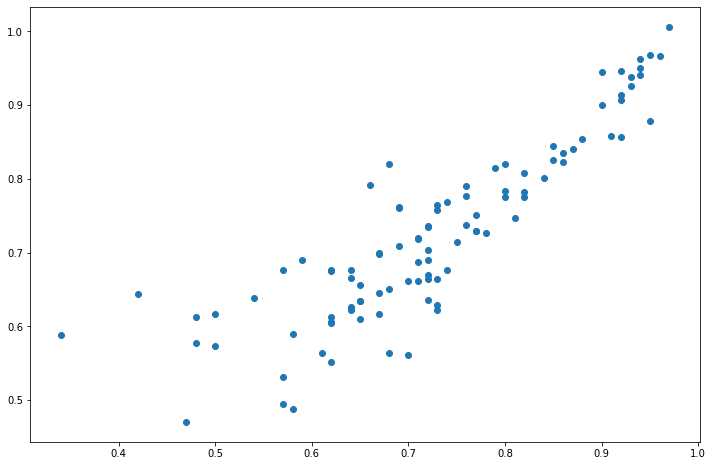

In [20]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,pred)

In [21]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test,pred)))

0.06347341437185279


In [22]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.7687758897286043


In [23]:
from sklearn.ensemble import RandomForestRegressor
rm = RandomForestRegressor()
rm.fit(X_train,y_train)

RandomForestRegressor()

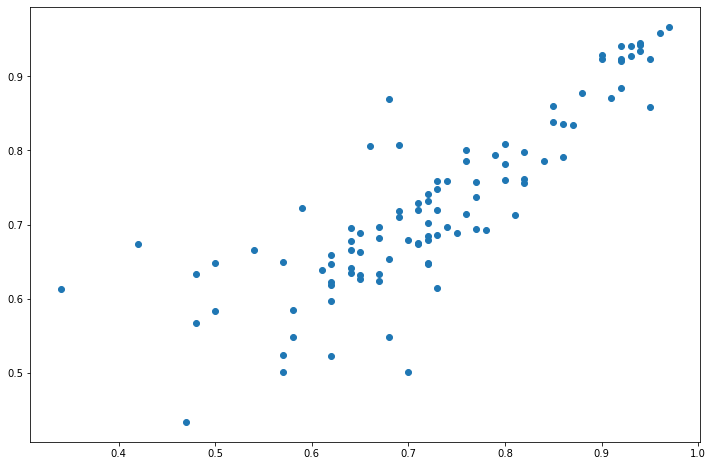

In [24]:
pred = rm.predict(X_test)
plt.figure(figsize=(12,8))
plt.scatter(y_test,pred)

In [25]:
print(np.sqrt(mean_squared_error(y_test,pred)))

0.07107092513820261


In [26]:
print(r2_score(y_test,pred))

0.7101099338789758
